In [36]:
# ! pip install emoji
# !pip install --upgrade typing-extensions
#!pip install arabic-reshaper

In [38]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import emoji
import nltk
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer
from arabic_reshaper import reshape
from sklearn.base import BaseEstimator, TransformerMixin

# Data Loading

In [7]:
df=pd.read_csv("E:/Arabic-Dialect-prediction-main/Arabic-Dialect-prediction-main/Data/dialect_text.csv")
df.head(10)

dialect                                               text
0      LY  @toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...
1      LY  @AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...
2      LY  @smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...
3      LY  @AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...
4      LY  @lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...
5      LY  @alibobkr63 او حتى من اي دين او طائفة. اسف ممك...
6      LY     @muhamed01111 باهي نستنوه. بلكي مشغول ولا حاجة
7      LY  @muhamed01111 مهما اختلفنا راه نحنا خوت. والله...
8      LY  @muhamed01111 بالنسبة ليا انا والله شبعت هم ون...
9      LY  @Ajo32asLibya @Jed_ly مو نحنا الحياة عندنا مية...

# Check Dataset Balancing

In [8]:
class_counts = df['dialect'].value_counts()
print(class_counts)

dialect
EG    57636
LY    36499
LB    27617
SD    14434
MA    11539
Name: count, dtype: int64


In [9]:
df.describe()

dialect                                               text
count   147725                                             147725
unique       5                                             147725
top         EG  @toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...
freq     57636                                                  1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147725 entries, 0 to 147724
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   dialect  147725 non-null  object
 1   text     147725 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [14]:
df['text'].duplicated().sum()

0

In [11]:
df.isnull().sum()

dialect    0
text       0
dtype: int64

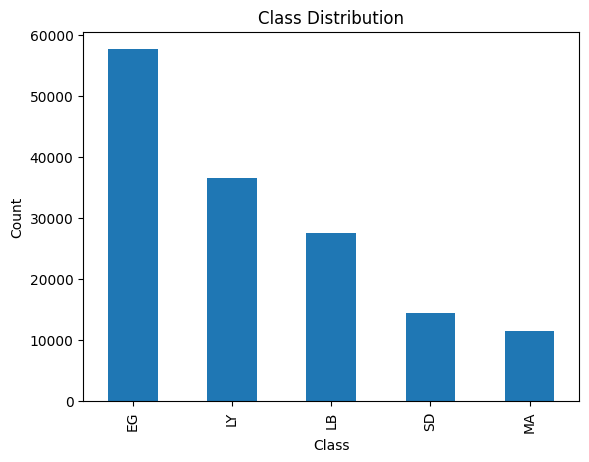

In [15]:
import matplotlib.pyplot as plt
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


### Unbalanced Data so I will split using stratify

# Data splitting

In [39]:
X = df['text']  # Features
y = df['dialect']  # Target variable

# Splitting the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Check Dataset Balancing

In [17]:
train_class_counts = y_train.value_counts()
print(class_counts)

dialect
EG    57636
LY    36499
LB    27617
SD    14434
MA    11539
Name: count, dtype: int64


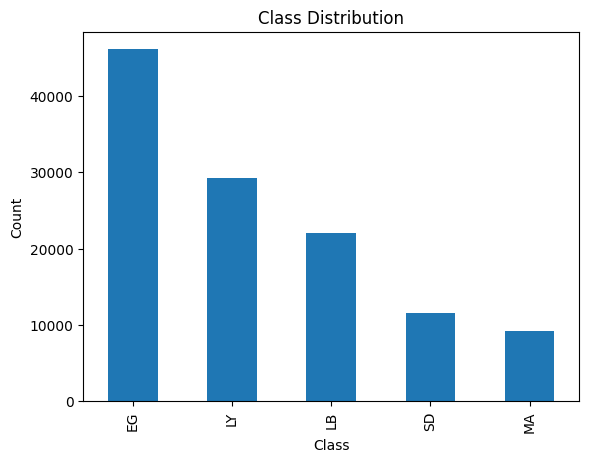

In [18]:
import matplotlib.pyplot as plt
train_class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


# clean_arabic_text

In [19]:
# Display a representative sample of text data (10%)
sample_texts = X.sample(frac=0.1, random_state=7)
for text in sample_texts:
    print(text)
    print('-' * 50)

#هوا_الحرية نداءك بهالوقت للست ليلى الصبح مش رابط الوليد بن طلال بطل يبعتلها مصاري الوضع صعب والشغل خفيف
--------------------------------------------------
@MahmoudRyad3 هي الناس دي ماتتكسفش على دمها😡
--------------------------------------------------
@auob_max علي خاطرك ياحنان لتوا قعدت جيعان ..هههه قالولي من مقولاتك
--------------------------------------------------
@Slooom_gh8 @Sara723J وفيه بند انه قيمة كسر العقد يمكن ان تزيد مع نهاية كل موسم 
يعني بعد سنتين مش حيكون نفس الشرط الجزائي
--------------------------------------------------
@emano_e1 @h32015_ جو فو زيم 🇸🇦🇲🇦 مواااح😚
--------------------------------------------------
أنا مش مع دول ياباشا
 أنا مع دوكهما 
 وبالامارة مش ساكنة فى التجمع
--------------------------------------------------
@amal_yousef9 شوفتى بقى وصلتك الضكة مش كدة 😅😅😅
--------------------------------------------------
@memo_fan بس مش قوي كده
--------------------------------------------------
@ManalWaell روحي وزاره القوي العامله هيا اللي بتدعم الشباب 😂
----------

In [40]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords_arabic = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
def clean_arabic_text(text):
    # Remove non-Arabic characters
    arabic_text = re.sub(r'[^\u0600-\u06FF\s]+', '', text)
    
    # Remove URLs and mentions
    arabic_text = re.sub(r'http\S+|@\w+', '', arabic_text)
    
    # Remove Arabic stopwords
    arabic_text = ' '.join(word for word in arabic_text.split() if word not in stopwords_arabic)
    
    # Optionally, remove additional characters or patterns specific to your use case
    arabic_text = re.sub(r'#\w+', '', arabic_text)
    arabic_text = re.sub(r'\d+', '', arabic_text)
    arabic_text = re.sub(r'[^\w\s]', '', arabic_text)
    # Remove extra whitespace
    arabic_text = arabic_text.strip()
    arabic_text = re.sub(r'\s+', ' ', arabic_text)
    # Convert to lowercase
    arabic_text = arabic_text.lower()
    
    return arabic_text

In [21]:
X_train

30200    @ahmedbuz والله بالعكس جو سمح لكن صقع سم لين خلاص
18885             @knowwhathappend ضربتها بالقلاية من بكري
70209    @momtazahmed14 يا استاذى الفاضل احنا عاصرنا كل...
16417    هوينه هانيبال ولد العقيد متزوج لبنانية عارضة أ...
64588    @AsmaAhm63626594 @mohamedmhany @Mony4718 @Ahme...
                               ...                        
14247    الطريق وانت جاي من تقاطع الاطفال ماشي شور شارع...
96197    @suewebas79 الثورجية ماكدينلى ان مفيش حد غيرهم...
24265        الوقت اللي تلهو فيه احدهم يصنع من العفسة كنشة
70427    @islammohammeda @tarek7658 مش ده برضه الجهاز ا...
97865          @BoAdly 👌😂😂😂😂ما هو حضرتك قلت قطيع خرفان بقى
Name: text, Length: 118180, dtype: object

In [25]:
X_train=X_train.apply(clean_arabic_text)

In [26]:
# Display a representative sample of text data (10%)
sample_texts = X_train.sample(frac=0.1, random_state=7)
for text in sample_texts:
    print(text)
    print('-' * 50)

نعرفها العادة كانت موجودة زمان هلبة علي أيام جدودي الأجيال اللي جت بعدها نهائي طبقتهاش
--------------------------------------------------
الواحد فعلا احتار فى ام الناس ده
--------------------------------------------------
اللهم امين منور ياديسووووو الله يبارك فيك ياراقي
--------------------------------------------------
إبتسام نجمة حاضرة بقوة رغم أنف الحاقدين وهي نجمة الملايين برافو إبتسام وبرافو رشيد حتاش جابها عزاء للحاقدين للأسف
--------------------------------------------------
اي وحدة افضل
--------------------------------------------------
اكيد مصدقيتك رح عيش امل فاضي
--------------------------------------------------
هاذ زمان يمشي شي يجي شي ماعندهم حنا ماهمنا راسنا دابا شوفو ولادكم العياشة اش غادي يوقع ليهم ورانا زمن ايلا ماتحركتوش المغرب
--------------------------------------------------
شوف سيد جاد انا مابهمني بتكون تقلل ااحترام صحباتي فهمت
--------------------------------------------------
الله شوف الغباء ده لبستين المكان ليه
--------------------------------------------------


In [41]:

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        transformed_X = X.copy()
        transformed_X = transformed_X.apply(self.clean_arabic_text)
        return transformed_X

    @staticmethod
    def clean_arabic_text(text):
        # Define Arabic stopwords
        stopwords_arabic = set(stopwords.words('arabic'))
        
        # Remove mentions
        text = re.sub(r'@\w+', '', text)
        # Remove hashtags
        text = re.sub(r'#\w+', '', text)
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove punctuation and numbers
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        # Remove extra whitespace
        text = text.strip()
        text = re.sub(r'\s+', ' ', text)
        # Convert to lowercase
        text = text.lower()
        
        # Convert to Arabic script
        text = reshape(text)
        # Remove diacritics
        text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)
        # Normalize Arabic letters
        text = re.sub("[إأآا]", "ا", text)
        text = re.sub("ى", "ي", text)
        text = re.sub("ؤ", "ء", text)
        text = re.sub("ئ", "ء", text)
        text = re.sub("ة", "ه", text)
        
        # Tokenization
        tokens = word_tokenize(text)
        
        # Remove stopwords
        tokens = [word for word in tokens if word not in stopwords_arabic]
        
        # Stemming
        stemmer = ISRIStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
        
        return ' '.join(tokens)

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [42]:
pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer())
])

# Apply the pipeline to train and test data
train_transformed = pipeline.fit_transform(X_train,y_train)
test_transformed = pipeline.transform(X_test)


print("Transformed Train Data:")
print(train_transformed)

print("\nTransformed Test Data:")
print(test_transformed)

Transformed Train Data:
30200                  ﻭﷲ ﺑﺎﻟﻌﻜﺲ ﺟﻮ ﺳﻤﺢ ﻟﻜﻦ ﺻﻘﻊ ﺳﻢ ﻟﻴﻦ ﺧﻼﺹ
18885                               ﺿﺮﺑﺘﻬﺎ ﺑﺎﻟﻘﻼﻳﺔ ﻣﻦ ﺑﻜﺮﻱ
70209     ﻳﺎ ﺍﺳﺘﺎﺫﻯ ﺍﻟﻔﺎﺿﻞ ﺍﺣﻨﺎ ﻋﺎﺻﺮﻧﺎ ﻛﻞ ﺩﻩ ﻣﺤﺪﺵ ﺣﻜﺎﻫﻮﻟﻨﺎ
16417    ﻫﻮﻳﻨﻪ ﻫﺎﻧﻴﺒﺎﻝ ﻭﻟﺪ ﺍﻟﻌﻘﻴﺪ ﻣﺘﺰﻭﺝ ﻟﺒﻨﺎﻧﻴﺔ ﻋﺎﺭﺿﺔ ﺃ...
64588          ﻣﺴﺎﺀ ﺍﻟﺴﻌﺎﺩﻩ ﻋﻠﻰ ﺣﻀﺮﺗﻚ ﻭﻛﻞ ﺍﻟﻤﻨﺸﻦ ﺍﻟﻤﺤﺘﺮﻣﻴﻦ
                               ...                        
14247    ﺍﻟﻄﺮﻳﻖ ﻭﺍﻧﺖ ﺟﺎﻱ ﻣﻦ ﺗﻘﺎﻃﻊ ﺍﻻﻃﻔﺎﻝ ﻣﺎﺷﻲ ﺷﻮﺭ ﺷﺎﺭﻉ ...
96197    ﺍﻟﺜﻮﺭﺟﻴﺔ ﻣﺎﻛﺪﻳﻨﻠﻰ ﺍﻥ ﻣﻔﻴﺶ ﺣﺪ ﻏﻴﺮﻫﻢ ﺑﻴﻔﻬﻢ ﻓﻰ ﺍﻟﺒﻠﺪ
24265        ﺍﻟﻮﻗﺖ ﺍﻟﻠﻲ ﺗﻠﻬﻮ ﻓﻴﻪ ﺍﺣﺪﻫﻢ ﻳﺼﻨﻊ ﻣﻦ ﺍﻟﻌﻔﺴﺔ ﻛﻨﺸﺔ
70427    ﻣﺶ ﺩﻩ ﺑﺮﺿﻪ ﺍﻟﺠﻬﺎﺯ ﺍﻟﻠﻰ ﻗﺎﻝ ﺍﻥ ﺗﻌﺪﺍﺩ ﺍﻟﻤﺴﻴﺤﻴﻴﻦ ...
97865                       ﻣﺎ ﻫﻮ ﺣﻀﺮﺗﻚ ﻗﻠﺖ ﻗﻄﻴﻊ ﺧﺮﻓﺎﻥ ﺑﻘﻰ
Name: text, Length: 118180, dtype: object

Transformed Test Data:
125146                ﺟﻬﺰﻱ ﺷﻨﻄﻚ ﻳﺎ ﻫﺒﻠﺔ ﻫﺒﻠﺔ ﻭ ﻣﺤﻤﻠﻴﻨﺎ ﻃﺒﻠﺔ
22050                                   ﻗﺼﺪﻱ ﻫﺬﺍ ﺷﻦ ﻳﻘﻮﻟﻮﻟﻪ
108968                                ﻫﻬﻬﻬﻪ ﺣﺒﻴﺖ ﻗﺼﻒ ﺻﺎﺭﻭﺧﻲ
11936     ﺍﻟﺨﻠﻮﺝ ﻫﻴﺎ ﺍﻟﻨﺎﻗﻪ ﺍﻟﻠﻲ ﻣﺎﺕ ﺣﻮﺍﺭﻫﺎ ﻛﻤﺎ ﻗﺎﻝ ﺍﻟﺸﺎ...
122610    ﻭﷲ ﺍﻟﺤﺮﻳﺮﻱ 

## Save pipeline

In [44]:
import joblib

# Save the pipeline to a file
joblib.dump(pipeline, 'pipeline.pkl')

# Load the pipeline from the file
loaded_pipeline = joblib.load('pipeline.pkl')